In [1]:
"".join([chr(ord(i)+3) for i in 'Microsoft@2020'])+'@'

'PlfurvriwC5353@'

In [13]:
import matplotlib.pyplot as plt

In [2]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 0.2786 - val_loss: 0.1962
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1749 - val_loss: 0.1563
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1465 - val_loss: 0.1356
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1300 - val_loss: 0.1228
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1197 - val_loss: 0.1143
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1125 - val_loss: 0.1084
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1075 - val_loss: 0.1042
Epoch 8/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1038 - val_loss: 0.1010
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1010 - val_loss: 0.0986
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0990 - val_loss: 0.096

In [9]:
result=autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
plt.imshow(result[0].reshape(28,28),cmap='gray');

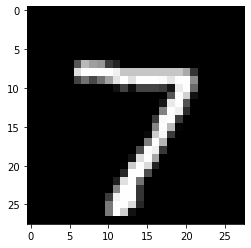

In [16]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray');

In [24]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [25]:
autoencoder = keras.Model(input_img, decoded)

In [26]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               1011

In [28]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [29]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.2480 - val_loss: 0.1685
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1487 - val_loss: 0.1324
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1277 - val_loss: 0.1209
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1185 - val_loss: 0.1136
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1131 - val_loss: 0.1100
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1091 - val_loss: 0.1061
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1059 - val_loss: 0.1034
Epoch 8/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1034 - val_loss: 0.1012
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1015 - val_loss: 0.0993
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0997 - val_lo

In [30]:
result=autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [31]:
plt.imshow(result[0].reshape(28,28),cmap='gray');

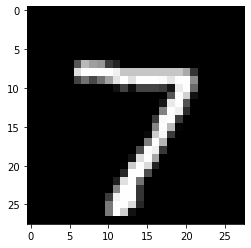

In [32]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray');

In [33]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [34]:
autoencoder = keras.Model(input_img, decoded)

In [35]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 4s 14ms/step - loss: 0.5570 - val_loss: 0.5340
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.5300 - val_loss: 0.5265
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.5246 - val_loss: 0.5229
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.5219 - val_loss: 0.5209
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.5207 - val_loss: 0.5202
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.5199 - val_loss: 0.5194
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.5193 - val_loss: 0.5189
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.5188 - val_loss: 0.5186
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.5183 - val_loss: 0.5182
Epoch 10/10
235/235 [==============================] - 3s 11ms/step - loss: 0.5180 - val_lo

In [37]:
result=autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


In [38]:
plt.imshow(result[0].reshape(28,28),cmap='gray');

In [39]:
plt.imshow(x_test_noisy[0].reshape(28,28),cmap='gray');